In [1]:
%cd ~/shrink/shrink

/impa/home/a/antonio.catao/shrink/shrink


/impa/home/a/antonio.catao/.cache/pypoetry/virtualenvs/shrink-MLdMKkcI-py3.10/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/impa/home/a/antonio.catao/.cache/pypoetry/virtualenvs/shrink-MLdMKkcI-py3.10/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import polars as pl
from viz_utils import line_plot_df, polars_to_latex_table
import matplotlib as mpl
fontsize = 8
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family']="sans-serif"
mpl.rcParams["font.size"]=fontsize
mpl.rcParams['lines.markersize'] = 4.5

TABLE 1 (Improved concentration via shrinkage)

In [3]:
df = pl.read_parquet("exp=is_shrinkage_good_metrics.parquet")
# fixed parameters
fixed_params_dict = {
    "delta": 0.05,
    "split_ratio": 0.05,
    "c_eta": 1.0,
    "is_normalized": False,
    "is_symmetrized": False,
    "contamination_level": 0.0,
    "n": 500
}
ommitted_cols = ["mae", "mse"]
filtered_parameters = fixed_params_dict.keys()
parameters_to_keep = [
    p for p in df.columns if p not in filtered_parameters and p not in ommitted_cols]
df = df[[col for col in df.columns if col not in ommitted_cols]]
df = df.filter(**fixed_params_dict)[parameters_to_keep]
df_formatted = df.with_columns(
    pl.format("a={},r={}", pl.col("a"), pl.col("r")).alias("distribution")
)
df = df_formatted[[
    col for col in df_formatted.columns if col not in ["a", "r"]]]
df = df.with_columns(pl.col("shrinkage_function").fill_null("none"))
print(polars_to_latex_table(df, ["base_estimator", "distribution"], ["shrinkage_function"], "quantile",
      highlight_conditions=2, reference_row_val=("none", ), float_format=0))


\begin{table}[ht]
\centering
\setlength{\tabcolsep}{1.5pt}
\begin{tabular*}{0.95\textwidth}{l@{\extracolsep{\fill}}|cccc|cccc|cccc|cccc}
& \multicolumn{4}{c|}{$\overline{X}$}& \multicolumn{4}{c|}{$M$}& \multicolumn{4}{c|}{TM}& \multicolumn{4}{c}{MoM}
\\
& N& SN& T& ST& N& SN& T& ST& N& SN& T& ST& N& SN& T& ST
\\
\hline
None & \(\mathbf{0}\) & \(\mathbf{0}\) & \(0\) & \(0\) & \(0\) & \(0\) & \(\mathbf{0}\) & \(0\) & \(\mathbf{0}\) & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) \\
$w(t)=\mathbf{1}_{t<1}$ & \(2\) & \(11\) & \(\mathbf{-37}\) & \(8\) & \(-17\) & \(-66\) & \(47\) & \(-60\) & \(2\) & \(7\) & \(\mathbf{-2}\) & \(6\) & \(-10\) & \(-3\) & \(\mathbf{-35}\) & \(10\) \\
$w(t)=1\wedge t^{-1}$ & \(\mathbf{0}\) & \(9\) & \(\mathbf{-38}\) & \(2\) & \(\mathbf{-19}\) & \(-67\) & \(\mathbf{43}\) & \(-62\) & \(\mathbf{1}\) & \(5\) & \(\mathbf{-4}\) & \(-0\) & \(-12\) & \(-5\) & \(\mathbf{-37}\) & \(4\) \\
$w(t)=(1-t^p)_+$ & \(1\) & \(2\) & \(-34\) & \(-5\) & \(\mathbf{-19}\) & \(-

FIGURE 1 (Improved concentration via shrinkage)

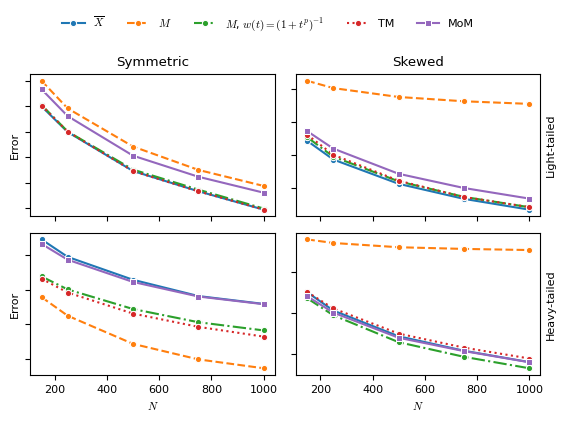

In [4]:
df = pl.read_parquet("exp=is_shrinkage_good_reduced_metrics.parquet")
# fixed parameters
fixed_params_dict = {
    "delta": 0.05,
    "split_ratio": 0.05,
    "c_eta": 1.0,
    "is_normalized": False,
    "is_symmetrized": False,
    "contamination_level": 0.0
}
row_subplot_key = "a"
col_subplot_key = "r"
x_key = "n"
y_key = "quantile"
graph_key = ["base_estimator","shrinkage_function"]
combinations_to_exclude = [
    {"base_estimator": "median", "shrinkage_function": "win"},
    {"base_estimator": "mean", "shrinkage_function": "exp"},
    {"base_estimator": "mean", "shrinkage_function": "inv"},
    {"base_estimator": "mean", "shrinkage_function": "atm"},
    {"base_estimator": "mean", "shrinkage_function": "win"},
    {"base_estimator": "mean", "shrinkage_function": "lv"},
    {"base_estimator": "tm", "shrinkage_function": "exp"},
    {"base_estimator": "tm", "shrinkage_function": "inv"},
    {"base_estimator": "tm", "shrinkage_function": "atm"},
    {"base_estimator": "tm", "shrinkage_function": "win"},
    {"base_estimator": "tm", "shrinkage_function": "lv"},
    {"base_estimator": "mom", "shrinkage_function": "exp"},
    {"base_estimator": "mom", "shrinkage_function": "inv"},
    {"base_estimator": "mom", "shrinkage_function": "atm"},
    {"base_estimator": "mom", "shrinkage_function": "win"},
    {"base_estimator": "mom", "shrinkage_function": "lv"},
]
ommitted_cols = ["mae","mse"]
filtered_parameters = fixed_params_dict.keys()
parameters_to_keep = [p for p in df.columns if p not in filtered_parameters and p not in ommitted_cols]
df = df[[col for col in df.columns if col not in ommitted_cols]]
df = df.filter(**fixed_params_dict)[parameters_to_keep]
df = df.with_columns(pl.col("shrinkage_function").fill_null("none"))
exclude_filter = pl.lit(False)
for combination in combinations_to_exclude:
    condition = pl.lit(True)
    for k, v in combination.items():
        condition = condition & (pl.col(k) == v)
    exclude_filter = exclude_filter | condition
df = df.filter(
    ~exclude_filter
)
df = df.with_columns(pl.col("quantile").log10().alias("quantile"))
fig = line_plot_df(df,x_key,y_key, graph_key, row_subplot_key,col_subplot_key, marker=True, figsize=(6,4), fontsize=fontsize)
fig.savefig("figures/is_shrinkage_good_reduced.pdf", bbox_inches='tight')

TABLE 2 (Impact of split proportion)

In [5]:
df = pl.read_parquet("exp=split_eval_metrics.parquet")
# fixed parameters
fixed_params_dict = {
    "delta": 0.05,
    "c_eta": 1.0,
    "is_normalized": False,
    "is_symmetrized": False,
    "contamination_level": 0.0,
    "n": 500
}
ommitted_cols = ["mae", "mse"]
filtered_parameters = fixed_params_dict.keys()
parameters_to_keep = [
    p for p in df.columns if p not in filtered_parameters and p not in ommitted_cols]
df = df[[col for col in df.columns if col not in ommitted_cols]]
df = df.filter(**fixed_params_dict)[parameters_to_keep]
df_formatted = df.with_columns(
    pl.format("a={},r={}", pl.col("a"), pl.col("r")).alias("distribution")
)
df = df_formatted[[
    col for col in df_formatted.columns if col not in ["a", "r"]]]
df = df.with_columns(pl.col("shrinkage_function").fill_null("none"))
df = df.with_columns(pl.col("split_ratio").fill_null("none"))
print(polars_to_latex_table(df, ["distribution", "split_ratio"], ["base_estimator", "shrinkage_function"], "quantile",
      reference_row_val=(None, "none"), float_format=0))


\begin{table}[ht]
\centering
\setlength{\tabcolsep}{1.5pt}
\begin{tabular*}{0.95\textwidth}{l@{\extracolsep{\fill}}|cccc|cccc|cccc|cccc}
& \multicolumn{4}{c|}{N}& \multicolumn{4}{c|}{SN}& \multicolumn{4}{c|}{T}& \multicolumn{4}{c}{ST}
\\
& No split& $0.05$& $0.5$& $0.95$& No split& $0.05$& $0.5$& $0.95$& No split& $0.05$& $0.5$& $0.95$& No split& $0.05$& $0.5$& $0.95$
\\
\hline
$\overline{X}$ None & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) & \(0\) \\
$\overline{X}$ $w(t)=\mathbf{1}_{t<1}$ & \(2\) & \(2\) & \(33\) & \(224\) & \(11\) & \(15\) & \(61\) & \(361\) & \(-38\) & \(-37\) & \(-22\) & \(52\) & \(5\) & \(7\) & \(39\) & \(158\) \\
$\overline{X}$ $w(t)=1\wedge t^{-1}$ & \(0\) & \(1\) & \(30\) & \(205\) & \(8\) & \(12\) & \(55\) & \(250\) & \(-39\) & \(-38\) & \(-24\) & \(42\) & \(-0\) & \(1\) & \(32\) & \(118\) \\
$\overline{X}$ $w(t)=(1-t^p)_+$ & \(-0\) & \(1\) & \(34\) & \(217\) & \(1\) & \(3\) & \(38\) &

TABLE 3 (Impact of contamination)

In [6]:
df = pl.read_parquet("exp=contamination_robustness_metrics.parquet")
# fixed parameters
fixed_params_dict = {
    "delta": 0.05,
    "c_eta": 1.0,
    "is_normalized": False,
    "is_symmetrized": False,
    "split_ratio": 0.05,
    "n": 500
}
ommitted_cols = ["mae", "mse"]
filtered_parameters = fixed_params_dict.keys()
parameters_to_keep = [
    p for p in df.columns if p not in filtered_parameters and p not in ommitted_cols]
df = df[[col for col in df.columns if col not in ommitted_cols]]
#df = df.with_columns(pl.col("split_ratio").fill_null("none"))
df = df.filter(**fixed_params_dict)[parameters_to_keep]
df_formatted = df.with_columns(
    pl.format("a={},r={}", pl.col("a"), pl.col("r")).alias("distribution")
)
df = df_formatted[[
    col for col in df_formatted.columns if col not in ["a", "r"]]]
df = df.with_columns(pl.col("shrinkage_function").fill_null("none"))
df = df.with_columns(pl.col("quantile").log10())
print(polars_to_latex_table(df, ["distribution", "contamination_level"], ["base_estimator","shrinkage_function"], "quantile",
                            float_format=1, highlight_conditions=2))


\begin{table}[ht]
\centering
\setlength{\tabcolsep}{1.5pt}
\begin{tabular*}{0.95\textwidth}{l@{\extracolsep{\fill}}|cccc|cccc|cccc|cccc}
& \multicolumn{4}{c|}{N}& \multicolumn{4}{c|}{SN}& \multicolumn{4}{c|}{T}& \multicolumn{4}{c}{ST}
\\
& $0.0$& $0.05$& $0.1$& $0.2$& $0.0$& $0.05$& $0.1$& $0.2$& $0.0$& $0.05$& $0.1$& $0.2$& $0.0$& $0.05$& $0.1$& $0.2$
\\
\hline
$\overline{X}$ None & \(\mathbf{-1.1}\) & \(4.7\) & \(5.0\) & \(5.3\) & \(\mathbf{-1.0}\) & \(4.7\) & \(5.0\) & \(5.3\) & \(-0.5\) & \(4.7\) & \(5.0\) & \(5.3\) & \(-0.3\) & \(4.7\) & \(5.0\) & \(5.3\) \\
$\overline{X}$ $w(t)=\mathbf{1}_{t<1}$ & \(-1.0\) & \(3.7\) & \(4.1\) & \(4.6\) & \(-0.9\) & \(3.7\) & \(4.1\) & \(4.6\) & \(-0.7\) & \(3.7\) & \(4.1\) & \(4.6\) & \(-0.3\) & \(3.7\) & \(4.1\) & \(4.6\) \\
$\overline{X}$ $w(t)=1\wedge t^{-1}$ & \(-1.1\) & \(3.9\) & \(4.4\) & \(4.9\) & \(-0.9\) & \(3.9\) & \(4.4\) & \(4.9\) & \(-0.7\) & \(3.9\) & \(4.4\) & \(4.9\) & \(-0.3\) & \(3.9\) & \(4.4\) & \(4.9\) \\
$\overline{X}$ $w(t)

FIGURE 2 (effect of split ratio)

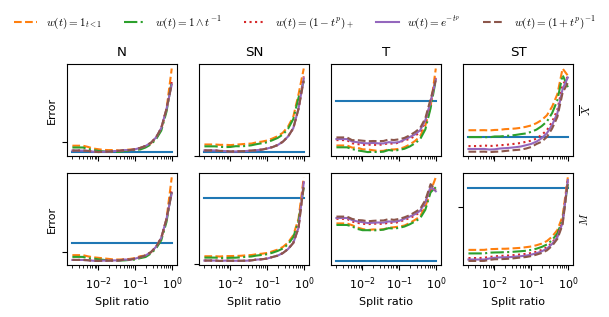

In [7]:
df = pl.read_parquet("exp=split_eval_graph_metrics.parquet")
# fixed parameters
fixed_params_dict = {
    "delta": 0.05,
    "c_eta": 1.0,
    "is_normalized": False,
    "is_symmetrized": False,
    "contamination_level": 0.0,
    "n": 500
}
row_subplot_key = "base_estimator"
col_subplot_key = "distribution"
x_key = "split_ratio"
y_key = "quantile"
graph_key = "shrinkage_function"
ommitted_cols = ["mae","mse"]
filtered_parameters = fixed_params_dict.keys()
parameters_to_keep = [p for p in df.columns if p not in filtered_parameters and p not in ommitted_cols]
df = df[[col for col in df.columns if col not in ommitted_cols]]
df = df.filter(**fixed_params_dict)[parameters_to_keep]
df_formatted = df.with_columns(
    pl.format("a={},r={}", pl.col("a"), pl.col("r")).alias("distribution")
)
df = df_formatted[[col for col in df_formatted.columns if col not in ["a","r"]]]
df = df.with_columns(pl.col("shrinkage_function").fill_null("none"))
fig = line_plot_df(df,x_key,y_key, graph_key, row_subplot_key,col_subplot_key, log_x_scale=True, log_y_scale=True, marker=False, figsize=(6,3), fontsize=fontsize)
fig.savefig("figures/split_eval_graph.pdf", bbox_inches='tight')

FIGURE 3 (impact of split ratio)

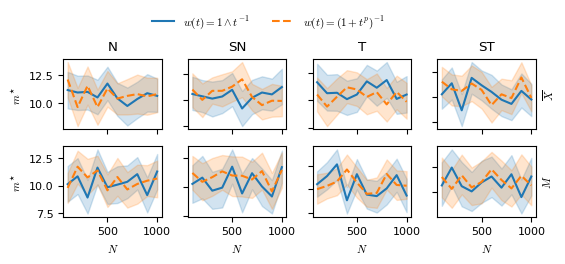

In [8]:
dfs = [pl.read_parquet(f"exp=split_eval_best_itr={i}_metrics.parquet") for i in range(50)]
# fixed parameters
fixed_params_dict = {
    "delta": 0.05,
    "c_eta": 1.0,
    "is_normalized": False,
    "is_symmetrized": False,
    "contamination_level": 0.0,
}
row_subplot_key = "base_estimator"
col_subplot_key = "distribution"
x_key = "n"
y_key = "best_m"
graph_key = "shrinkage_function"
ommitted_cols = ["mae","mse"]
filtered_parameters = fixed_params_dict.keys()
for i in range(50):
    df = dfs[i]
    df = df[[col for col in df.columns if col not in ommitted_cols]]
    parameters_to_keep = [p for p in df.columns if p not in filtered_parameters and p not in ommitted_cols]
    df = df.filter(**fixed_params_dict)[parameters_to_keep]
    df_formatted = df.with_columns(
        pl.format("a={},r={}", pl.col("a"), pl.col("r")).alias("distribution")
    )
    df = df_formatted[[col for col in df_formatted.columns if col not in ["a","r"]]]
    df = df.with_columns(pl.col("shrinkage_function").fill_null("none"))
    dfs[i] = df

# get the best split_ratio for each configuration
best_split_ratio_dfs = []
for df in dfs:
    best_split_ratio_df = df.group_by(["base_estimator", "distribution", "shrinkage_function", "n"]).agg(
        pl.col("quantile").min().alias("quantile"),
        pl.col("split_ratio").first().alias("best_m")
    )
    best_split_ratio_dfs.append(best_split_ratio_df)
best_split_ratio_df = pl.concat(best_split_ratio_dfs)
best_split_ratio_df = best_split_ratio_df.filter((pl.col("shrinkage_function")=="inv") | (pl.col("shrinkage_function")=="win"))
fig = line_plot_df(best_split_ratio_df,x_key,y_key, graph_key, row_subplot_key,col_subplot_key, marker=False, sharey=True, yticks=True, figsize=(6,2.5), fontsize=fontsize)
fig.savefig("figures/best_split_ratio.pdf", bbox_inches='tight')

TABLE $ (Assumption-violating shrinkage estimators)

In [10]:
df = pl.read_parquet("exp=bad_shrinkage_metrics.parquet")
# fixed parameters
fixed_params_dict = {
    "delta": 0.05,
    "c_eta": 1.0,
    "contamination_level": 0.0,
    "n": 500,
    "split_ratio": 0.05 
}
ommitted_cols = ["mae", "mse"]
filtered_parameters = fixed_params_dict.keys()
parameters_to_keep = [
    p for p in df.columns if p not in filtered_parameters and p not in ommitted_cols]
df = df[[col for col in df.columns if col not in ommitted_cols]]
#df = df.with_columns(pl.col("split_ratio").fill_null("none"))
df = df.filter(**fixed_params_dict)[parameters_to_keep]
df_formatted = df.with_columns(
    pl.format("a={},r={}", pl.col("a"), pl.col("r")).alias("distribution")
)
df = df_formatted[[
    col for col in df_formatted.columns if col not in ["a", "r"]]]
df = df.with_columns(pl.col("shrinkage_function").fill_null("none"))
print(polars_to_latex_table(df, ["base_estimator", "distribution"], ["shrinkage_function"], "quantile",
                            float_format=0, highlight_conditions=-2, reference_row_val=("none",)))


\begin{table}[ht]
\centering
\setlength{\tabcolsep}{1.5pt}
\begin{tabular*}{0.95\textwidth}{l@{\extracolsep{\fill}}|cccc|cccc|cccc|cccc}
& \multicolumn{4}{c|}{$\overline{X}$}& \multicolumn{4}{c|}{$M$}& \multicolumn{4}{c|}{TM}& \multicolumn{4}{c}{MoM}
\\
& N& SN& T& ST& N& SN& T& ST& N& SN& T& ST& N& SN& T& ST
\\
\hline
None & \(0\) & \(0\) & \(\mathbf{0}\) & \(\mathbf{0}\) & \(\mathbf{0}\) & \(\mathbf{0}\) & \(0\) & \(\mathbf{0}\) & \(0\) & \(\mathbf{0}\) & \(0\) & \(\mathbf{0}\) & \(\mathbf{0}\) & \(\mathbf{0}\) & \(0\) & \(\mathbf{0}\) \\
$w(t)=1\wedge t^{-1}$ & \(1\) & \(\mathbf{12}\) & \(-38\) & \(\mathbf{1}\) & \(-20\) & \(\mathbf{-67}\) & \(45\) & \(\mathbf{-62}\) & \(1\) & \(\mathbf{7}\) & \(-3\) & \(\mathbf{0}\) & \(-13\) & \(\mathbf{-5}\) & \(-36\) & \(\mathbf{3}\) \\
$w(t)=(1+t^p)^{-1}$ & \(1\) & \(\mathbf{3}\) & \(-31\) & \(-10\) & \(-20\) & \(-69\) & \(60\) & \(-65\) & \(2\) & \(-1\) & \(8\) & \(-9\) & \(-12\) & \(-12\) & \(-29\) & \(-8\) \\
$w(t)=(\ln(e+t))^{-1}$ & \(2\) &